<a href="https://colab.research.google.com/github/SangMini2/Project_Hanium/blob/main/ProjectNovember.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import datetime
import matplotlib

In [4]:
uploaded = files.upload()

Saving real.csv to real (2).csv


In [5]:
df = pd.read_csv(io.StringIO(uploaded['real.csv'].decode("utf-8")))
df["날짜"] = pd.to_datetime(df["날짜"])

df.index = df["날짜"]
PM10 = df["PM10"]

In [4]:
new_df = pd.read_csv(io.StringIO(uploaded['real.csv'].decode("utf-8")))
new_df["날짜"] = pd.to_datetime(new_df["날짜"])

In [7]:
data = df.loc[: , ["PM10"]]
data

,PM10
날짜,
2012-01-01,78.708
2012-01-02,48.875
2012-01-03,70.625
2012-01-04,56.750
2012-01-05,50.625
...,...
2021-12-26,9.917
2021-12-27,15.750
2021-12-29,37.708


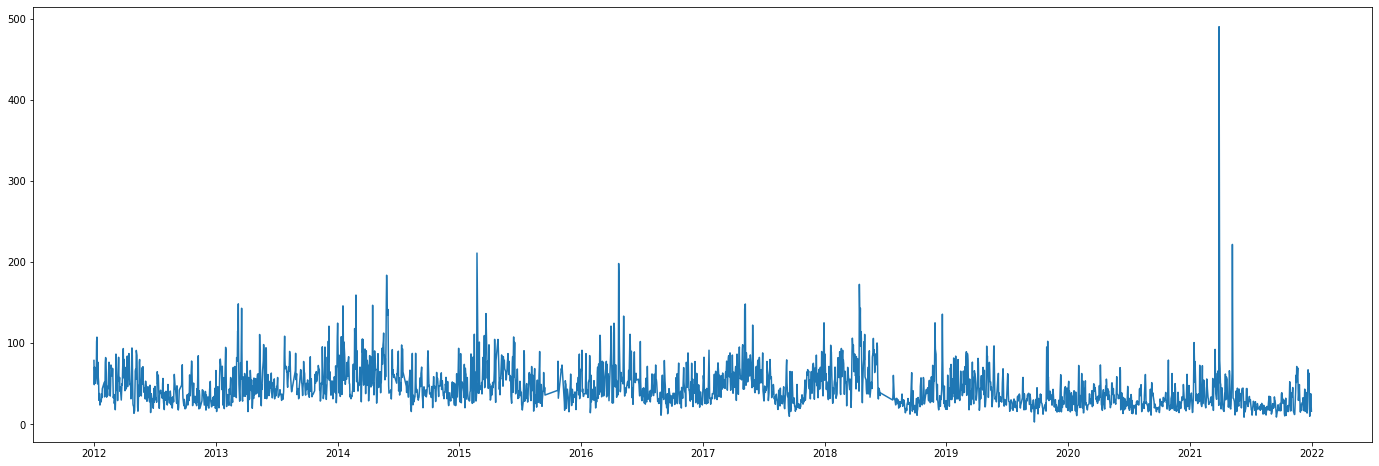

In [6]:
plt.figure(figsize = (24,8))
plt.plot(data)

그래프를 그려보니 이상한 점들과 안정적이지 않은 그래프들이 보임, index에 점프가 있을 수 있다고 예상해서 인덱스가 점프되는 구간을 찾아보기 위해 수행

In [7]:
start = datetime.datetime(2012,1,1)
for i in range(2891) :
  if data.index[i] != start :
    print(f"여기서 빵꾸? {data.index[i]} , start {start}, 몇번째 ? {i+1}")
    break
  start += datetime.timedelta(days = 1)

여기서 빵꾸? 2012-02-01 00:00:00 , start 2012-01-27 00:00:00, 몇번째 ? 27


In [8]:
start = datetime.datetime(2012,1,1)
empty_lst = []
i = 0
while start != datetime.datetime(2021,12,31) :
  if data.index[i] != start :
    empty_lst.append(start)
  else :
    i += 1
  start += datetime.timedelta(days = 1)

In [9]:
#2012년부터 2021년까지 PM10의 값이 비어있는 날짜의 수 찾기
len(empty_lst)

762

In [10]:
datetime.datetime(2021,12,31) - datetime.datetime(2012,1,1)

datetime.timedelta(days=3652)

즉 2012년부터 2021년까지 3653일 중 762일의 값이 비어있습니다.
데이터의 오류가 여기서 발생할 수 있다고 가정하고 비어있는 값들을 채워주겠습니다.

In [11]:
datetime.datetime(2021,12,31) - datetime.datetime(2021,12,30)

datetime.timedelta(days=1)

In [12]:
2891 + 762

3653

In [13]:
empty_lst[:30]

[datetime.datetime(2012, 1, 27, 0, 0),
 datetime.datetime(2012, 1, 28, 0, 0),
 datetime.datetime(2012, 1, 29, 0, 0),
 datetime.datetime(2012, 1, 30, 0, 0),
 datetime.datetime(2012, 1, 31, 0, 0),
 datetime.datetime(2012, 2, 9, 0, 0),
 datetime.datetime(2012, 2, 16, 0, 0),
 datetime.datetime(2012, 2, 22, 0, 0),
 datetime.datetime(2012, 2, 29, 0, 0),
 datetime.datetime(2012, 3, 9, 0, 0),
 datetime.datetime(2012, 3, 14, 0, 0),
 datetime.datetime(2012, 3, 21, 0, 0),
 datetime.datetime(2012, 3, 22, 0, 0),
 datetime.datetime(2012, 3, 28, 0, 0),
 datetime.datetime(2012, 4, 5, 0, 0),
 datetime.datetime(2012, 4, 12, 0, 0),
 datetime.datetime(2012, 4, 19, 0, 0),
 datetime.datetime(2012, 4, 26, 0, 0),
 datetime.datetime(2012, 5, 1, 0, 0),
 datetime.datetime(2012, 5, 3, 0, 0),
 datetime.datetime(2012, 5, 8, 0, 0),
 datetime.datetime(2012, 5, 18, 0, 0),
 datetime.datetime(2012, 5, 23, 0, 0),
 datetime.datetime(2012, 5, 31, 0, 0),
 datetime.datetime(2012, 6, 7, 0, 0),
 datetime.datetime(2012, 6, 12, 

비어있는 날짜의 PM10 데이터를 그 최근의 PM10 값으로 채워 넣어 데이터의 빈 값을 없애주겠습니다.

In [ ]:
start = datetime.datetime(2012,1,1)
i = 0
while start != datetime.datetime(2021,12,31) :
  if data.index[i] != start :
    data.loc[start] = (data["PM10"][i-1])
    print(data["PM10"][i-1:i])
  else :
    i += 1
  start += datetime.timedelta(days = 1)

In [9]:
data.sort_index(inplace = True)
data

,PM10
날짜,
2012-01-01,78.708
2012-01-02,48.875
2012-01-03,70.625
2012-01-04,56.750
2012-01-05,50.625
...,...
2021-12-27,15.750
2021-12-28,15.750
2021-12-29,37.708


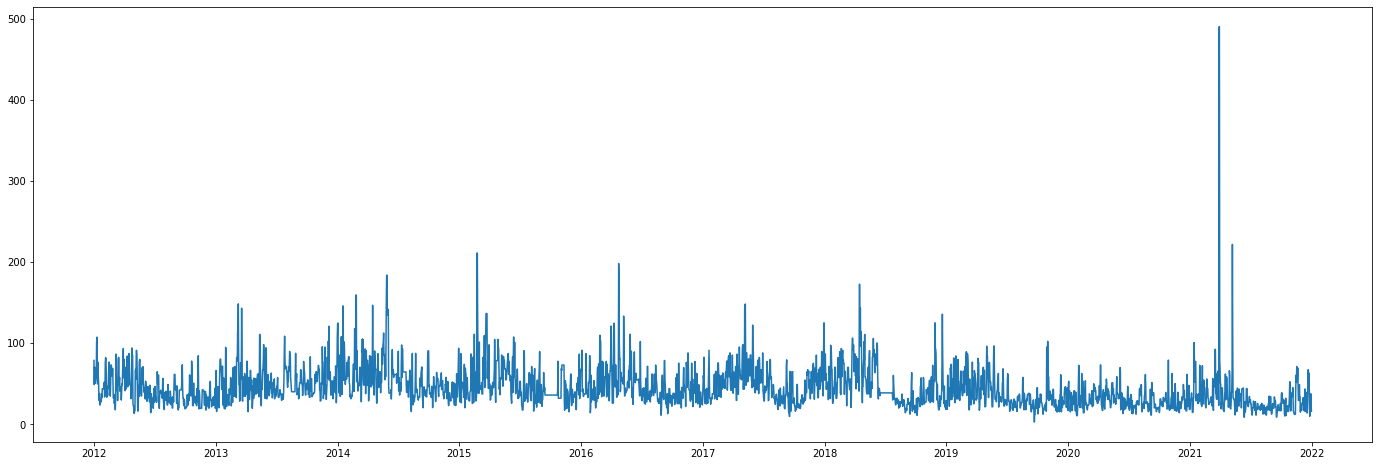

In [16]:
plt.figure(figsize = (24,8))

plt.plot(data)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import itertools

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

train_data , test_data = train_test_split(data, test_size = 0.2 , shuffle = False)

Acf와 Pacf 체크해보겠습니다.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


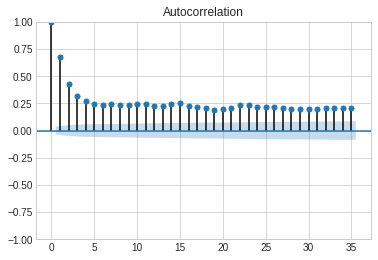

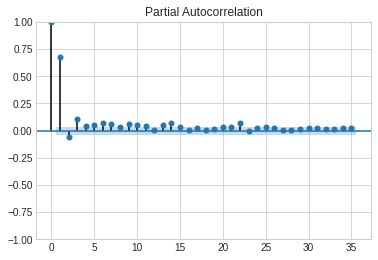

In [18]:
plot_acf(train_data)
plot_pacf(train_data)
plt.show()

In [ ]:
#AutoCorrelation 1차 차분 (ACF가 천천히 떨어지므로 Non - Stationary하게 보임)

In [19]:
#Differencing

diff_train_data = train_data.copy()
diff_train_data = diff_train_data.diff()
diff_train_data = diff_train_data.dropna()

print(len(diff_train_data))

print(len(train_data))

2921
2922


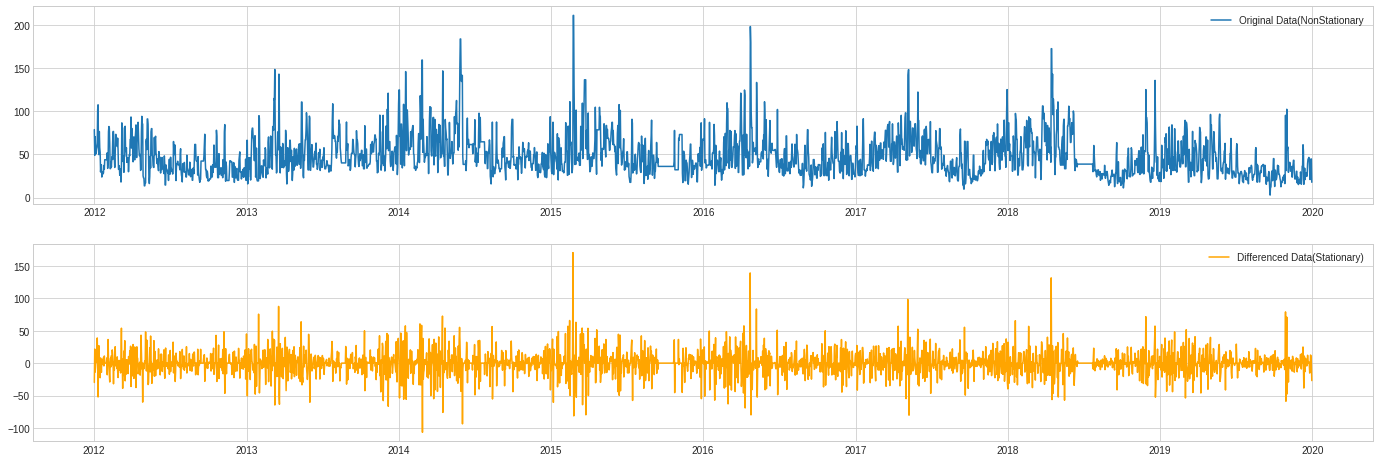

In [20]:
plt.figure(figsize = (24,8))
plt.subplot(211)
plt.plot(train_data)
plt.legend(["Original Data(NonStationary"])
plt.subplot(212)
plt.plot(diff_train_data, "orange")
plt.legend(["Differenced Data(Stationary)"])
plt.show()


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


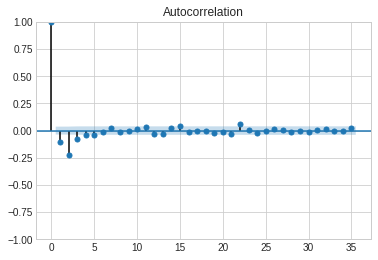

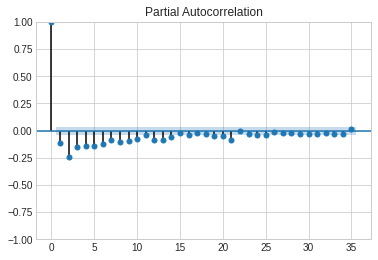

In [21]:
#1차 차분 후 ACF, PACF plot

plot_acf(diff_train_data)
plot_pacf(diff_train_data)
plt.show()

In [22]:
model = ARIMA(train_data, order = (1,1,0))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PM10   No. Observations:                 2922
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -12674.996
Date:                Sat, 12 Nov 2022   AIC                          25353.991
Time:                        11:55:34   BIC                          25365.951
Sample:                    01-01-2012   HQIC                         25358.299
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1098      0.015     -7.300      0.000      -0.139      -0.080
sigma2       343.8213      4.187     82.115      0.000     335.615     352.028
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):              6470.32
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
model = ARIMA(train_data.values, order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2922
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12395.170
Date:                Sat, 12 Nov 2022   AIC                          24796.339
Time:                        11:03:16   BIC                          24814.278
Sample:                             0   HQIC                         24802.801
                               - 2922                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5788      0.013     44.269      0.000       0.553       0.604
ma.L1         -0.9669      0.005   -182.210      0.000      -0.977      -0.957
sigma2       283.8536      3.394     83.624      0.000     277.201     290.507
===================================================================================
Ljung-Box (L1) (Q):                  15.69   Jarque-Bera (JB):              8857.31
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
model = ARIMA(train_data.values, order = (0,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2922
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -12655.149
Date:                Sat, 12 Nov 2022   AIC                          25314.297
Time:                        11:03:17   BIC                          25326.257
Sample:                             0   HQIC                         25318.605
                               - 2922                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2457      0.013    -18.260      0.000      -0.272      -0.219
sigma2       339.3550      4.152     81.724      0.000     331.216     347.494
===================================================================================
Ljung-Box (L1) (Q):                  14.26   Jarque-Bera (JB):              6510.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model = ARIMA(train_data.values, order = (2,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2922
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -12369.984
Date:                Sat, 12 Nov 2022   AIC                          24747.969
Time:                        11:03:37   BIC                          24771.888
Sample:                             0   HQIC                         24756.584
                               - 2922                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6422      0.014     44.540      0.000       0.614       0.670
ar.L2         -0.1350      0.015     -8.786      0.000      -0.165      -0.105
ma.L1         -0.9570      0.006   -160.011      0.000      -0.969      -0.945
sigma2       279.0258      3.442     81.059      0.000     272.279     285.772
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              8473.15
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
model = ARIMA(train_data.values, order = (3,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2922
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -12368.594
Date:                Sat, 12 Nov 2022   AIC                          24747.188
Time:                        11:03:56   BIC                          24777.086
Sample:                             0   HQIC                         24757.957
                               - 2922                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6490      0.015     43.497      0.000       0.620       0.678
ar.L2         -0.1536      0.018     -8.566      0.000      -0.189      -0.118
ar.L3          0.0321      0.016      2.007      0.045       0.001       0.063
ma.L1         -0.9598      0.006   -155.309      0.000      -0.972      -0.948
sigma2       278.7549      3.452     80.746      0.000     271.989     285.521
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8563.75
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
print("Examples of parameter combinations for Seasonal ARIMA..")
p = range(0,4)
d = range(1,2)
q = range(0,4)
pdq = list(itertools.product(p,d,q))

aic = []
for i in pdq :
  model = ARIMA(train_data.values, order = (i))
  model_fit = model.fit()
  print(f"ARIMA: {i} >> AIC : {round(model_fit.aic,2)}")
  aic.append(round(model_fit.aic , 2))

Examples of parameter combinations for Seasonal ARIMA..
ARIMA: (0, 1, 0) >> AIC : 25387.34
ARIMA: (0, 1, 1) >> AIC : 25314.3
ARIMA: (0, 1, 2) >> AIC : 24871.01
ARIMA: (0, 1, 3) >> AIC : 24766.36
ARIMA: (1, 1, 0) >> AIC : 25353.99
ARIMA: (1, 1, 1) >> AIC : 24796.34
ARIMA: (1, 1, 2) >> AIC : 24744.36
ARIMA: (1, 1, 3) >> AIC : 24746.3
ARIMA: (2, 1, 0) >> AIC : 25177.78
ARIMA: (2, 1, 1) >> AIC : 24747.97
ARIMA: (2, 1, 2) >> AIC : 24746.29
ARIMA: (2, 1, 3) >> AIC : 24747.92
ARIMA: (3, 1, 0) >> AIC : 25114.91
ARIMA: (3, 1, 1) >> AIC : 24747.19
ARIMA: (3, 1, 2) >> AIC : 24748.2
ARIMA: (3, 1, 3) >> AIC : 24749.92


In [47]:
#Find Optimal Parameters
optimal = [(pdq[i] , j) for i,j in enumerate(aic) if j == min(aic)]
optimal

[((1, 1, 2), 24744.36)]

In [48]:
model_opt = ARIMA(train_data.values, order=(1,1,2))
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2922
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -12368.181
Date:                Sat, 12 Nov 2022   AIC                          24744.363
Time:                        11:08:26   BIC                          24768.281
Sample:                             0   HQIC                         24752.978
                               - 2922                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4072      0.027     15.176      0.000       0.355       0.460
ma.L1         -0.7167      0.028    -25.363      0.000      -0.772      -0.661
ma.L2         -0.2325      0.025     -9.423      0.000      -0.281      -0.184
sigma2       278.6751      3.399     81.979      0.000     272.013     285.338
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8548.72
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
prediction_arima = model_opt_fit.forecast(len(test_data))
arima_predicted_value = prediction_arima
arima_predicted_index = list(test_data.index)
r2 = r2_score(test_data, prediction_arima)
r2

-0.001426130637657952

In [54]:
prediction_arima

array([20.77439336, 26.94362484, 29.45573985, 30.4786747 , 30.89521443,
       31.06482967, 31.13389711, 31.16202141, 31.17347365, 31.17813701,
       31.18003593, 31.18080917, 31.18112404, 31.18125225, 31.18130446,
       31.18132572, 31.18133437, 31.1813379 , 31.18133933, 31.18133992,
       31.18134016, 31.18134025, 31.18134029, 31.18134031, 31.18134031,
       31.18134032, 31.18134032, 31.18134032, 31.18134032, 31.18134032,
       31.18134032, 31.18134032, 31.18134032, 31.18134032, 31.18134032,
       31.18134032, 31.18134032, 31.18134032, 31.18134032, 31.18134032,
       31.18134032, 31.18134032, 31.18134032, 31.18134032, 31.18134032,
       31.18134032, 31.18134032, 31.18134032, 31.18134032, 31.18134032,
       31.18134032, 31.18134032, 31.18134032, 31.18134032, 31.18134032,
       31.18134032, 31.18134032, 31.18134032, 31.18134032, 31.18134032,
       31.18134032, 31.18134032, 31.18134032, 31.18134032, 31.18134032,
       31.18134032, 31.18134032, 31.18134032, 31.18134032, 31.18

예측치가 모두 같은 값이 나온다.

이상함

Seasonal 값을 넣어보자

In [ ]:
print("Examples of parameter combinations for Seasonal ARIMA...")
p = range(0,4)
d = range(1,2)
q = range(0,4)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0] , x[1] , x[2] , 12) for x in list(itertools.product(p,d,q))]

aic = []
params = []
for i in pdq :
  for j in seasonal_pdq :
    try :
      model = SARIMAX(train_data.values, order = (i) , seasonal_order = (j))
      model_fit = model.fit()
      print(f"SARIMA : {i}{j} >> AIC : {round(model_fit.aic , 2)}")
      aic.append(round(model_fit.aic, 2))
      params.append((i,j))
    except :
      continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMA : (0, 1, 0)(0, 1, 0, 12) >> AIC : 27388.04
SARIMA : (0, 1, 0)(0, 1, 1, 12) >> AIC : 25358.96
SARIMA : (0, 1, 0)(0, 1, 2, 12) >> AIC : 25358.56
SARIMA : (0, 1, 0)(0, 1, 3, 12) >> AIC : 25359.35
SARIMA : (0, 1, 0)(1, 1, 0, 12) >> AIC : 26538.19
SARIMA : (0, 1, 0)(1, 1, 1, 12) >> AIC : 25358.59
SARIMA : (0, 1, 0)(1, 1, 2, 12) >> AIC : 25358.82
SARIMA : (0, 1, 0)(1, 1, 3, 12) >> AIC : 25362.36
SARIMA : (0, 1, 0)(2, 1, 0, 12) >> AIC : 26203.38
SARIMA : (0, 1, 0)(2, 1, 1, 12) >> AIC : 25359.54
SARIMA : (0, 1, 0)(2, 1, 2, 12) >> AIC : 25362.4


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 0)(2, 1, 3, 12) >> AIC : 25361.15
SARIMA : (0, 1, 0)(3, 1, 0, 12) >> AIC : 26009.19
SARIMA : (0, 1, 0)(3, 1, 1, 12) >> AIC : 25359.94
SARIMA : (0, 1, 0)(3, 1, 2, 12) >> AIC : 25363.54


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 0)(3, 1, 3, 12) >> AIC : 25363.26
SARIMA : (0, 1, 1)(0, 1, 0, 12) >> AIC : 27317.22
SARIMA : (0, 1, 1)(0, 1, 1, 12) >> AIC : 25286.11
SARIMA : (0, 1, 1)(0, 1, 2, 12) >> AIC : 25285.61
SARIMA : (0, 1, 1)(0, 1, 3, 12) >> AIC : 25286.96
SARIMA : (0, 1, 1)(1, 1, 0, 12) >> AIC : 26457.32
SARIMA : (0, 1, 1)(1, 1, 1, 12) >> AIC : 25285.79
SARIMA : (0, 1, 1)(1, 1, 2, 12) >> AIC : 25289.36
SARIMA : (0, 1, 1)(1, 1, 3, 12) >> AIC : 25289.64
SARIMA : (0, 1, 1)(2, 1, 0, 12) >> AIC : 26114.65
SARIMA : (0, 1, 1)(2, 1, 1, 12) >> AIC : 25287.16


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 1)(2, 1, 2, 12) >> AIC : 25288.62


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 1)(2, 1, 3, 12) >> AIC : 25289.97
SARIMA : (0, 1, 1)(3, 1, 0, 12) >> AIC : 25900.2
SARIMA : (0, 1, 1)(3, 1, 1, 12) >> AIC : 25288.35
SARIMA : (0, 1, 1)(3, 1, 2, 12) >> AIC : 25290.95
SARIMA : (0, 1, 1)(3, 1, 3, 12) >> AIC : 25289.68
SARIMA : (0, 1, 2)(0, 1, 0, 12) >> AIC : 26803.62
SARIMA : (0, 1, 2)(0, 1, 1, 12) >> AIC : 24845.66
SARIMA : (0, 1, 2)(0, 1, 2, 12) >> AIC : 24843.05
SARIMA : (0, 1, 2)(0, 1, 3, 12) >> AIC : 24845.04
SARIMA : (0, 1, 2)(1, 1, 0, 12) >> AIC : 25958.39
SARIMA : (0, 1, 2)(1, 1, 1, 12) >> AIC : 24843.08


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 2)(1, 1, 2, 12) >> AIC : 24845.05
SARIMA : (0, 1, 2)(1, 1, 3, 12) >> AIC : 24846.68
SARIMA : (0, 1, 2)(2, 1, 0, 12) >> AIC : 25666.64


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 2)(2, 1, 1, 12) >> AIC : 24845.05
SARIMA : (0, 1, 2)(2, 1, 2, 12) >> AIC : 24846.69


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 2)(2, 1, 3, 12) >> AIC : 24846.74
SARIMA : (0, 1, 2)(3, 1, 0, 12) >> AIC : 25492.06


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 2)(3, 1, 1, 12) >> AIC : 24846.42
SARIMA : (0, 1, 2)(3, 1, 2, 12) >> AIC : 24848.58


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 2)(3, 1, 3, 12) >> AIC : 24846.77
SARIMA : (0, 1, 3)(0, 1, 0, 12) >> AIC : 26661.41
SARIMA : (0, 1, 3)(0, 1, 1, 12) >> AIC : 24742.3


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 3)(0, 1, 2, 12) >> AIC : 24742.43


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 3)(0, 1, 3, 12) >> AIC : 24744.14
SARIMA : (0, 1, 3)(1, 1, 0, 12) >> AIC : 25831.72
SARIMA : (0, 1, 3)(1, 1, 1, 12) >> AIC : 24742.46
SARIMA : (0, 1, 3)(1, 1, 2, 12) >> AIC : 24746.01
SARIMA : (0, 1, 3)(1, 1, 3, 12) >> AIC : 24746.42
SARIMA : (0, 1, 3)(2, 1, 0, 12) >> AIC : 25529.28


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA : (0, 1, 3)(2, 1, 1, 12) >> AIC : 24744.19
SARIMA : (0, 1, 3)(2, 1, 2, 12) >> AIC : 24746.46


예전의 데이터를 가지고 Optimal한 결과치를 낸 파라미터를 이용해서 prediction을 만들어보았습니다.

In [17]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Train Data와 Test Data를 나누어서 ARIMA모델로 예측해보기

In [28]:
# optimal = [(((2,1,1), (0,1,3,12))] : 데이터를 추가하기 전의 데이터의 Optimal한 값

In [21]:
model_opt = SARIMAX(train_data, order = (2,1,1) , seasonal_order = (0,1,3,12) , 
                    enforce_stationarity = True ,
                    endforce_invertibility = True)
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                       PM10   No. Observations:                 2922
Model:             SARIMAX(2, 1, 1)x(0, 1, [1, 2, 3], 12)   Log Likelihood              -12356.228
Date:                                    Sat, 12 Nov 2022   AIC                          24726.456
Time:                                            10:31:34   BIC                          24768.285
Sample:                                        01-01-2012   HQIC                         24741.525
                                             - 12-31-2019                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6404      0.015     43.618      0.000       0.612       0.669
ar.L2         -0.1367      0.015     -8.876      0.000      -0.167      -0.106
ma.L1         -0.9544      0.006   -149.389      0.000      -0.967      -0.942
ma.S.L12      -1.0231      0.092    -11.175      0.000      -1.203      -0.844
ma.S.L24       0.0134      0.023      0.593      0.553      -0.031       0.058
ma.S.L36       0.0102      0.018      0.552      0.581      -0.026       0.046
sigma2       279.7768     25.156     11.122      0.000     230.472     329.082
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              8415.43
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
prediction = model_opt_fit.forecast(len(test_data))
predicted_value = prediction
predicted_index = list(test_data.index)
r2 = r2_score(test_data, prediction)
r2

-0.02610071301481076

In [30]:
data[2922:]

,PM10
날짜,
2020-01-01,16.958
2020-01-02,48.250
2020-01-03,53.000
2020-01-04,32.792
2020-01-05,41.250
...,...
2021-12-27,15.750
2021-12-28,15.750
2021-12-29,37.708


In [25]:
prediction

2020-01-01    19.904864
2020-01-02    25.587172
2020-01-03    27.160411
2020-01-04    29.131471
2020-01-05    29.871422
                ...    
2021-12-27    25.371999
2021-12-28    25.120137
2021-12-29    24.738032
2021-12-30    24.251131
2021-12-31    25.073229
Freq: D, Name: predicted_mean, Length: 731, dtype: float64

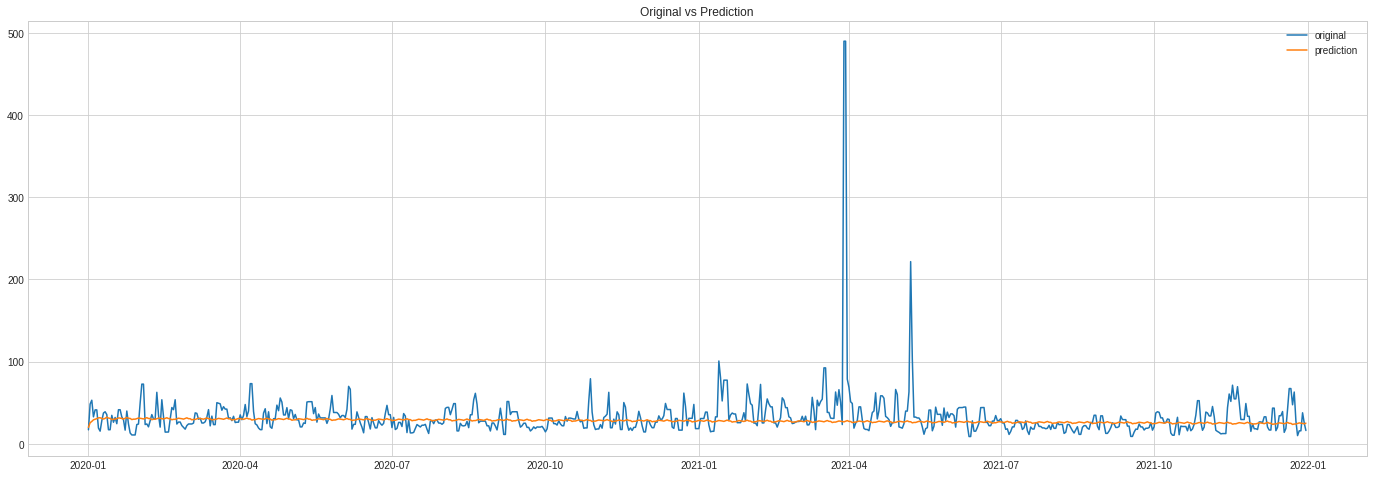

In [31]:
plt.figure(figsize = (24,8))
plt.plot(data[2922:] , label = "original")
plt.plot(prediction , label = "prediction")
plt.title("Original vs Prediction")
plt.legend()
plt.show()

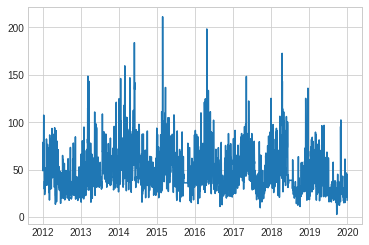

In [32]:
plt.plot(train_data)

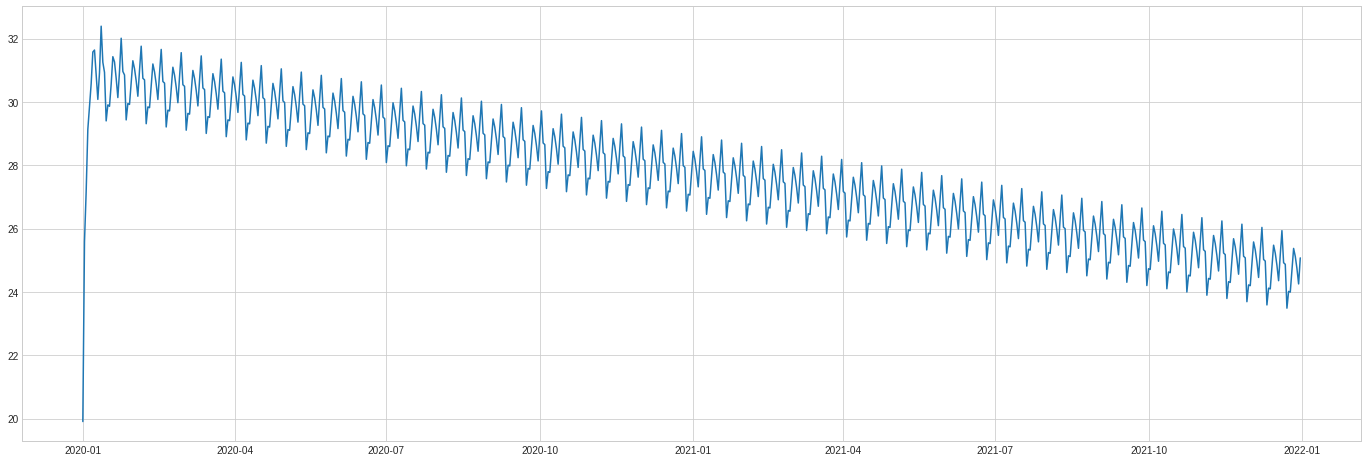

In [26]:
plt.figure(figsize = (24,8))

plt.plot(prediction)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


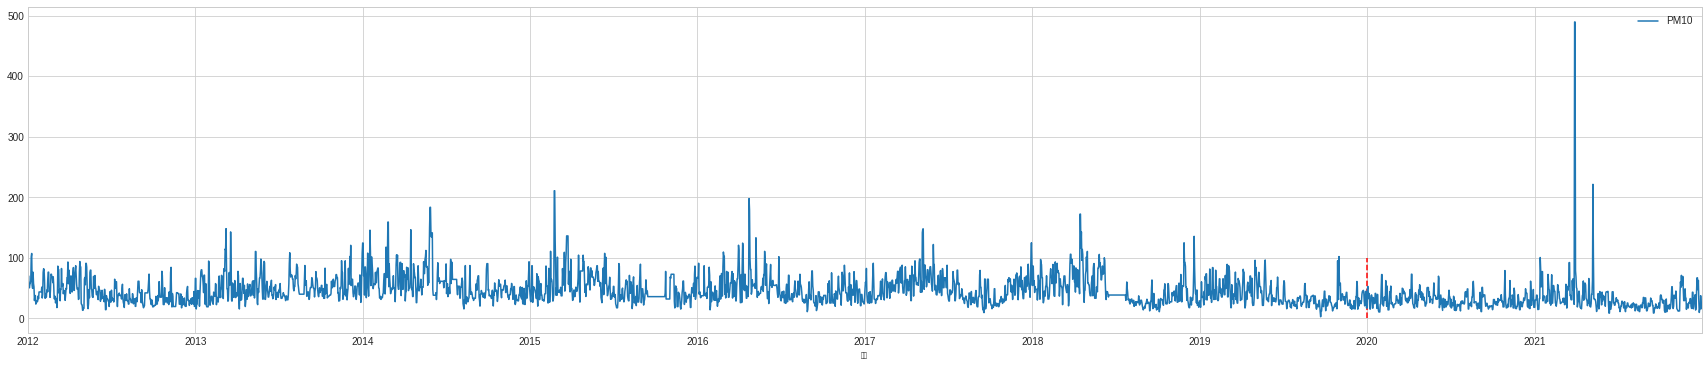

In [25]:
# 전체 데이터 범위 예측값 표기

fig, ax = plt.subplots(figsize=(30,6))
data.plot(ax=ax);
flag = test_data.index[0]
ax.vlines(flag , 0 , 100 , linestyle = "--" , color = 'r' , label = "Start of Prediction")
ax.plot(predict_index, predicted_value , label = "Prediction" , color = "r")
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = "k" , alpha = 0.1 , label = "0.95 interval")
ax.legend()
plt.show()